In [1]:
import sys, pandas as pd, numpy as np
import ROOT , time , os, sys , math , datetime
import matplotlib.pyplot as plt
import matplotlib as mpl , seaborn as sns; sns.set(style="white", color_codes=True , font_scale=1)
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac')
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/CLASEG2DataMining/EG2DataMiningPackage/mac')
import GeneralPlot as gp , Initiation as init
from root_numpy import tree2array
from ROOT import TPlots, TAnalysis, TAnalysisEG2 , TEG2dm , TCalcPhysVarsEG2 , TSchemeDATA 
%matplotlib inline
dirname = init.createnewdir()
dm  = TEG2dm()


In [2]:
A=12
variables = ['Xb'   ,'Pmiss.P()'    ,'Pmiss.Pt()'   ,'theta_pq'     ,'p_over_q' , 'Pcm.Mag()' 
             , 'pEdep[0]', 'protons[0].P()', 'pEdep[1]', 'protons[1].P()', 'pEdep[2]', 'protons[2].P()']
ana_all = TAnalysisEG2("SRCPmissXb_NoCTofDATA_%s"% dm.Target(A))
all_events = tree2array( ana_all.GetTree() , branches=variables , selection=None )
ana_all3p = TAnalysisEG2("SRCPmissXb_NoCTofDATA_%s"% dm.Target(A) , ROOT.TCut("Np>=3"))
all_ppp = tree2array( ana_all3p.GetTree() , branches=variables , selection='Np>=3' )
ana_ppp = TAnalysisEG2("pppSRCCut_NoCTofDATA_%s"% dm.Target(A) )
ppp_src = tree2array( ana_ppp.GetTree() , branches=variables )
# ana_ppp_alltargets = TAnalysisEG2("pppSRCCut_NoCTofDATA_C12_Al27_Fe56_Pb208" )

In [3]:
def plot_distplot( x , bins , label , x_label ,  xmin , xmax ):
    g = sns.distplot( x , bins=bins, kde=False , label=label)
    g.set_xlabel(x_label,fontsize=25)
    g.set( yscale="log" )

def plot_hist1d_ppp( var , xmin , xmax , nbins , x_label ):
    
    bins = np.linspace(xmin,xmax,nbins)
    fig = plt.figure(figsize = [10,8])
    ax = plt.subplot(111)
    plot_distplot( all_events[var] , bins , 'all' , x_label , xmin , xmax )
    plot_distplot( all_ppp[var]  , bins , 'all 3p' , x_label , xmin , xmax )
    plot_distplot( ppp_src[var] , bins , 'ppp-candidates (%d)'%len(ppp_src) , x_label ,  xmin , xmax )
    plt.legend(fontsize=25)
    fig.subplots_adjust(bottom=0.15)
    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(25) 
    plt.show()
    fig.savefig( dirname + "/ppp_" + var + ".pdf" )

    
def plot_hist2d_ppp( var_x , xmin , xmax , nbinsx , x_label , var_y, ymin , ymax , nbinsy , y_label ):
    
    binsx = np.linspace(xmin,xmax,nbinsx)
    binsy = np.linspace(ymin,ymax,nbinsy)
    fig = plt.figure(figsize = [10,8])
    ax = plt.subplot(111)
    plt.scatter(all_events[var_x], all_events[var_y] , color='blue')
    plt.scatter(all_ppp[var_x], all_ppp[var_y] , color='green')
    plt.scatter(ppp_src[var_x], ppp_src[var_y] , color='red')
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_xlabel(x_label,fontsize=25)
    ax.set_ylabel(y_label,fontsize=25)
    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(25) 

    plt.show()
    fig.savefig( dirname + "/ppp_" + var_x + "_vs_" + var_y + ".png" )
    
def plot_col2d( var_x , xmin , xmax , nbinsx , x_label , var_y, ymin , ymax , nbinsy , y_label , ana=ana_all ):
    fig = plt.figure(figsize=[10,5])
    fig, ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'aspect':'equal'})
    h = ana.H2( var_x , var_y ,ROOT.TCut(),'',nbinsx,xmin,xmax,nbinsy,ymin,ymax)
    H = np.ones((nbinsx,nbinsy))
    for bin_x in range(nbinsx):
        for bin_y in range(nbinsy):
            H[bin_x][bin_y]= float(h.GetBinContent(bin_x,bin_y)) 
    extent = [xmin,xmax,ymin,ymax]
    im = plt.imshow(H,interpolation='none', cmap='CMRmap_r',origin='lower', extent=extent)
    im = ax.imshow(np.ma.masked_where(H==0, H), cmap='CMRmap_r', interpolation='none', origin='lower', extent=extent)
    ax.set_xlabel(x_label,fontsize=25)
    ax.set_ylabel(y_label,fontsize=25)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    ax.set_aspect('auto')
    cb = plt.colorbar()
    for t in cb.ax.get_yticklabels():
         t.set_fontsize(20)
    fig.savefig( dirname + "/ppp_" + var_x + "_vs_" + var_y + ".png" )    


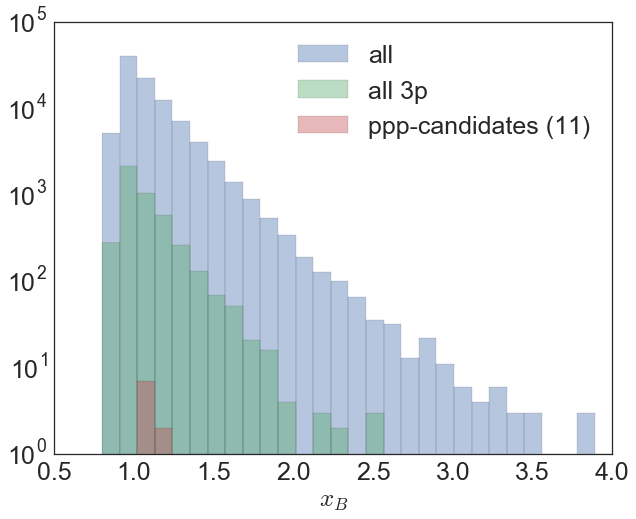

In [32]:
plot_hist1d_ppp( 'Xb', 0.8 , 4 , 30 , '$x_B$' )

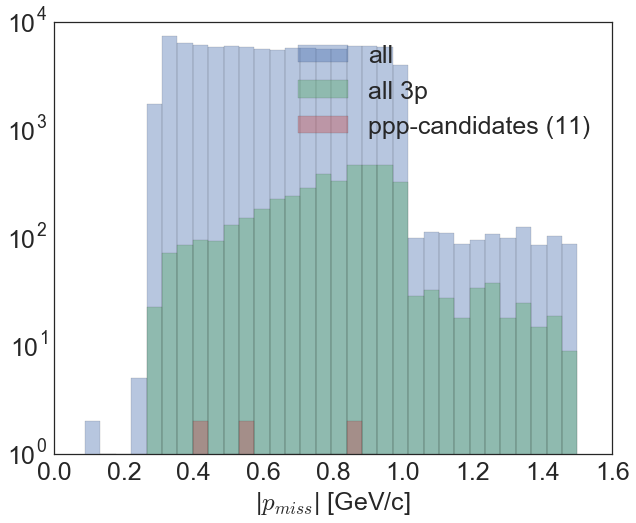

In [34]:
plot_hist1d_ppp( 'Pmiss.P()', 0 , 1.5 , 35 , '|$p_{miss}$| [GeV/c]' )

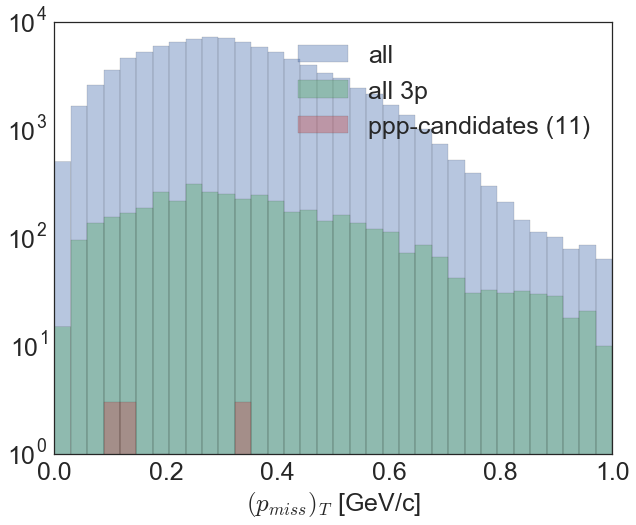

In [35]:
plot_hist1d_ppp( 'Pmiss.Pt()', 0 , 1 , 35 , '$(p_{miss})_T$ [GeV/c]' )

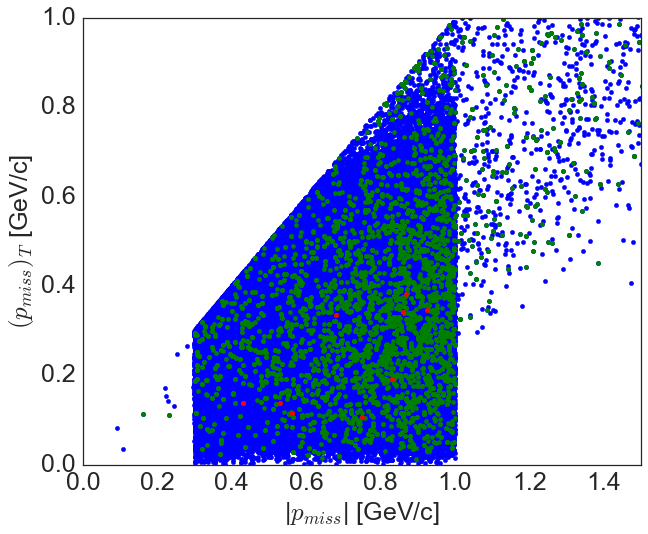

In [41]:
plot_hist2d_ppp( 'Pmiss.P()' , 0 , 1.5 , 35 , '|$p_{miss}$| [GeV/c]' , 'Pmiss.Pt()', 0 , 1 , 35 , '$(p_{miss})_T$ [GeV/c]' )

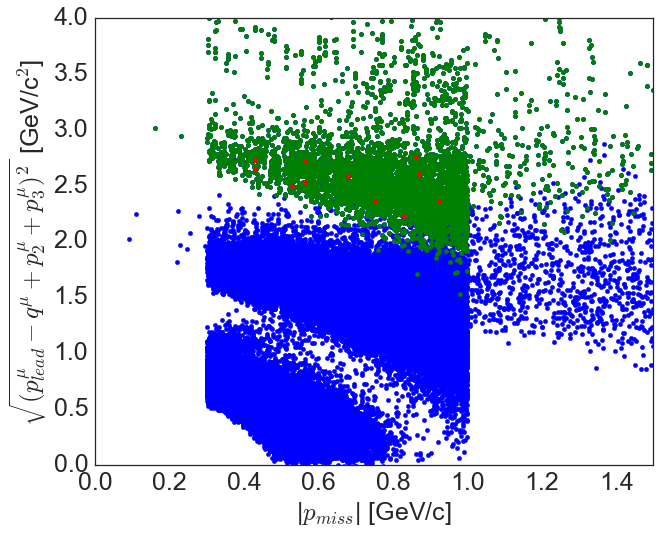

In [46]:
plot_hist2d_ppp( 'Pmiss.P()' , 0 , 1.5 , 35 , '|$p_{miss}$| [GeV/c]' , 'Pcm.Mag()', 0 , 4 , 35 , '$\\sqrt{(p^{\mu}_{lead}-q^{\mu}+p^{\mu}_2+p^{\mu}_3)^{2}}$ [GeV/c$^{2}$]' )

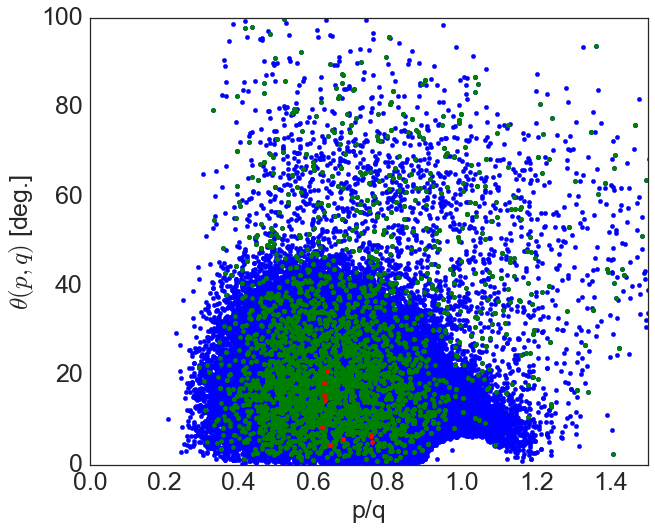

In [50]:
plot_hist2d_ppp( 'p_over_q' , 0 , 1.5 , 35 , 'p/q' , 'theta_pq', 0 , 100 , 100 , '$\\theta(p,q)$ [deg.]' )

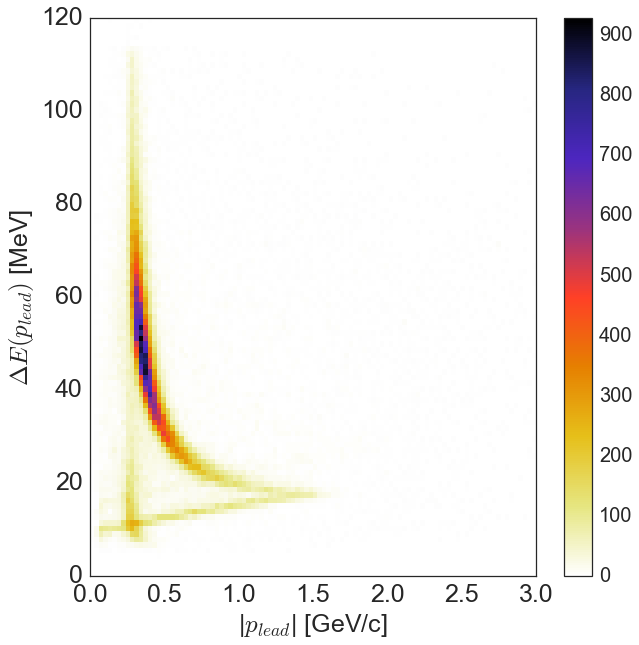

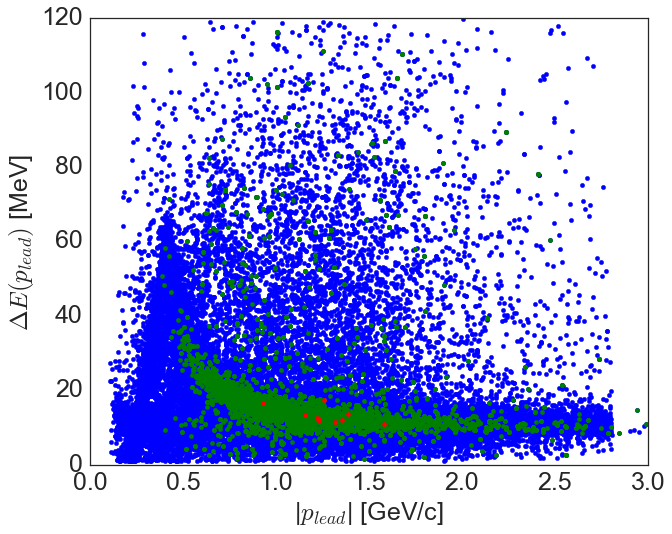

In [109]:
plot_col2d( 'protons.P()' , 0 , 3 , 100 , '|$p_{lead}$| [GeV/c]' , 'pEdep', 0 , 120 , 100 , '$\\Delta E(p_{lead})$ [MeV]' )
plot_hist2d_ppp( 'protons[0].P()' , 0 , 3 , 100 , '|$p_{lead}$| [GeV/c]' , 'pEdep[0]', 0 , 120 , 100 , '$\\Delta E(p_{lead})$ [MeV]' )

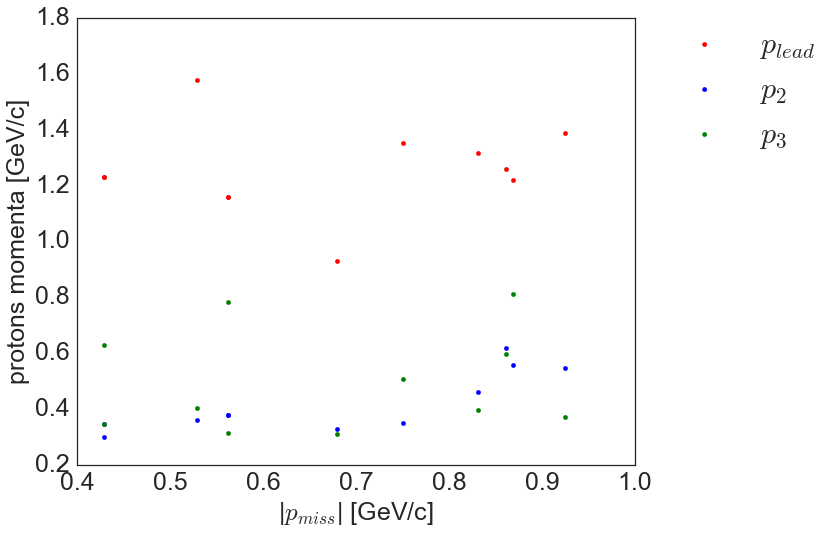

In [12]:
# p1/p2 vs. p(miss) - to show a typical event 
fig = plt.figure(figsize = [10,8])
ax = plt.subplot(111)
plt.scatter(ppp_src['Pmiss.P()'], ppp_src['protons[0].P()'] , color='red' , label='$p_{lead}$')
plt.scatter(ppp_src['Pmiss.P()'], ppp_src['protons[1].P()'] , color='blue' , label='$p_2$')
plt.scatter(ppp_src['Pmiss.P()'], ppp_src['protons[2].P()'] , color='green', label='$p_3$')
ax.set_xlabel('|$p_{miss}$| [GeV/c]',fontsize=25)
ax.set_ylabel('protons momenta [GeV/c]',fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig.savefig( dirname + "/ppp_p2p3_vs_pmiss.pdf" )

In [21]:
ppp_src['protons[1].P()']

array([array([ 0.32726698]), array([ 0.61882868]), array([ 0.35140999]),
       array([ 0.46151013]), array([ 0.54685776]), array([ 0.3802058]),
       array([ 0.3802058]), array([ 0.55600648]), array([ 0.34734286]),
       array([ 0.30016294]), array([ 0.3618539])], dtype=object)

In [24]:
zip(ppp_src['Pmiss.P()'],ppp_src['protons[2].P()'],ppp_src['protons[1].P()'])

[(0.67934975850380719, array([ 0.31097958]), array([ 0.32726698])),
 (0.86097478010967055, array([ 0.59635465]), array([ 0.61882868])),
 (0.75079105906363608, array([ 0.50883745]), array([ 0.35140999])),
 (0.83109349526083975, array([ 0.39468243]), array([ 0.46151013])),
 (0.92446835860503007, array([ 0.36970202]), array([ 0.54685776])),
 (0.5630726825703215, array([ 0.78213735]), array([ 0.3802058])),
 (0.5630726825703215, array([ 0.31270799]), array([ 0.3802058])),
 (0.86885331171929314, array([ 0.81280998]), array([ 0.55600648])),
 (0.42966685923194675, array([ 0.62940003]), array([ 0.34734286])),
 (0.42966685923194675, array([ 0.34734286]), array([ 0.30016294])),
 (0.52913024535215092, array([ 0.40420735]), array([ 0.3618539]))]

In [19]:
ppp_src['Pmiss.P()']

array([ 0.67934976,  0.86097478,  0.75079106,  0.8310935 ,  0.92446836,
        0.56307268,  0.56307268,  0.86885331,  0.42966686,  0.42966686,
        0.52913025])